Carrega arquivos do Drive


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import os

folder_path = "/content/drive/MyDrive/Doutorado/dataset"

for dirname, dirnames, filenames in os.walk(folder_path):
    #print(f"Pasta atual: {dirname}")
    #print(f"Subpastas: {dirnames}")
    #print(f"Arquivos: {filenames}")
    # Contamos o número de arquivos nesta pasta específica
    print(f"Pasta: {dirname} - Número de arquivos: {len(filenames)}")

Pasta: /content/drive/MyDrive/Doutorado/dataset - Número de arquivos: 1
Pasta: /content/drive/MyDrive/Doutorado/dataset/healthy - Número de arquivos: 18984
Pasta: /content/drive/MyDrive/Doutorado/dataset/phoma - Número de arquivos: 6571
Pasta: /content/drive/MyDrive/Doutorado/dataset/cerscospora - Número de arquivos: 8141
Pasta: /content/drive/MyDrive/Doutorado/dataset/leaf_rust - Número de arquivos: 8346
Pasta: /content/drive/MyDrive/Doutorado/dataset/miner - Número de arquivos: 16978


✅ 🔁 Código comentado: Reconhecimento de doenças em folhas de café

🧱 Etapa 1: Preparação do dataset
python

In [13]:
!pip install opencv-python
!pip install tensorflow
!pip install tensorflow-addons

# 📥 Leitura das imagens e rótulos com transformação e salvamento do dataset

In [14]:
# # 📦 Importa bibliotecas
# import os
# import cv2
# import numpy as np
# from tensorflow.keras.utils import to_categorical
# from tqdm import tqdm
# import concurrent.futures # ⬅️ Biblioteca para paralelismo

# # (Seu código de setup que já definimos)
# dataset_path = '/content/drive/MyDrive/Doutorado/dataset'
# IMG_SIZE = 50
# classes = ['healthy', 'miner', 'cerscospora', 'phoma', 'leaf_rust']
# class_map = {cls: idx for idx, cls in enumerate(classes)}

# # --- 1. Função para processar UMA imagem ---
# # Esta função será executada em paralelo para cada imagem.
# def process_image(img_path):
#     """Lê, redimensiona e normaliza uma única imagem."""
#     try:
#         img = cv2.imread(img_path)
#         if img is None:
#             # Retorna None se a imagem não puder ser lida (corrompida, etc.)
#             return None
#         # Redimensiona para o tamanho definido (IMG_SIZE)
#         img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
#         # Normaliza os pixels para o intervalo [0, 1]
#         img = img / 255.0
#         return img
#     except Exception as e:
#         print(f"\n[Erro] Falha ao processar {img_path}: {e}")
#         return None

# # --- 2. Mapear todos os caminhos de imagem e rótulos primeiro ---
# all_image_paths = []
# all_labels_list = []
# print("Mapeando todos os arquivos de imagem...")
# for cls in classes:
#     folder = os.path.join(dataset_path, cls)
#     for img_name in os.listdir(folder):
#         all_image_paths.append(os.path.join(folder, img_name))
#         all_labels_list.append(class_map[cls])
# print(f"Encontradas {len(all_image_paths)} imagens para processar.")

# # --- 3. Executar o processamento em paralelo ---
# processed_images = []
# # ProcessPoolExecutor cria um pool de processos (geralmente um por núcleo de CPU)
# with concurrent.futures.ProcessPoolExecutor() as executor:
#     # 'executor.map' aplica a função 'process_image' a cada item da lista 'all_image_paths'
#     # tqdm nos dá uma barra de progresso sobre o andamento do processo paralelo
#     results = list(tqdm(executor.map(process_image, all_image_paths), total=len(all_image_paths), desc="Processando imagens em paralelo"))

# # --- 4. Filtrar resultados e montar o dataset final ---
# # É crucial filtrar imagens que falharam (retornaram None) e seus rótulos correspondentes
# final_data = []
# final_labels = []
# for i, img_result in enumerate(results):
#     if img_result is not None:
#         final_data.append(img_result)
#         final_labels.append(all_labels_list[i])

# # 🎲 Converte para arrays NumPy
# X = np.array(final_data, dtype='float32')
# y = to_categorical(np.array(final_labels), num_classes=len(classes))

# # Salva o Dataset Transformado
# print(f"✅ Processamento concluído. {len(X)} imagens processadas com sucesso.")
# print("Salvando os arrays...")
# np.savez_compressed('dataset_processado.npz', X=X, y=y)
# print("💾 Arquivo 'dataset_processado.npz' salvo com sucesso!")

In [15]:
# # 📥 Leitura das imagens e rótulos
# data, labels = [], []
# for cls in classes:
#     folder = os.path.join(dataset_path, cls)
#     for img_name in os.listdir(folder):
#         img_path = os.path.join(folder, img_name)
#         print(f"Processando: {img_path}")
#         try:
#             img = cv2.imread(img_path)
#             img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
#             img = img / 255.0  # Normaliza entre 0 e 1
#             data.append(img)
#             labels.append(class_map[cls])
#         except:
#             print(f"Erro ao processar: {img_path}")

# # 🎲 Converte para arrays NumPy
# X = np.array(data, dtype='float32')
# y = to_categorical(np.array(labels), num_classes=len(classes))

# # Salva o Dataset Transformado
# print("✅ Processamento concluído. Salvando os arrays...")

# # Salva os arrays X e y em um único arquivo comprimido chamado 'dataset_processado.npz'
# np.savez_compressed('dataset_processado.npz', X=X, y=y)

# print("💾 Arquivo 'dataset_processado.npz' salvo com sucesso!")

# Leitura do Dataset salvo e faz o treinamento

In [17]:
from sklearn.model_selection import train_test_split

# --- Etapa de Carregamento ---
# Nome do arquivo que você salvou anteriormente
processed_file = '/content/drive/MyDrive/Doutorado/dataset/dataset_processado.npz'

# Carrega o arquivo .npz
print(f"🚀 Carregando dataset de '{processed_file}'...")
data = np.load(processed_file)

# Extrai os arrays X e y do arquivo
X = data['X']
y = data['y']

# 📌 Etapa 1: divide 70% treino e 30% temporário (teste + predição)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 📌 Etapa 2: divide 30% temporário em 20% teste e 10% predição
X_test, X_pred, y_test, y_pred = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42, stratify=y_temp)

# 🔎 Verifica as proporções
print(f"Total de imagens: {len(X)}")
print(f"Treino: {len(X_train)}")
print(f"Teste: {len(X_test)}")
print(f"Predição (validação final): {len(X_pred)}")

🚀 Carregando dataset de '/content/drive/MyDrive/Doutorado/dataset/dataset_processado.npz'...
Total de imagens: 59019
Treino: 41313
Teste: 11863
Predição (validação final): 5843


 Etapa 2: Construção e treinamento da CNN

In [20]:
# 📦 Importa bibliotecas essenciais
import tensorflow as tf
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.metrics import Metric, Precision, Recall # ⬅️ Métricas nativas do Keras

# --- 1. Definição da Métrica F1-Score Customizada ---
# Substitui a necessidade do tensorflow-addons
class F1Score(Metric):
    def __init__(self, name='f1_score', **kwargs):
        super().__init__(name=name, **kwargs)
        # Internamente, esta métrica usará a Precisão e o Recall do próprio Keras
        self.precision = Precision()
        self.recall = Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        # Atualiza o estado das métricas internas a cada lote
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        # Calcula o resultado final do F1-Score
        p = self.precision.result()
        r = self.recall.result()
        # Retorna 2 * (p * r) / (p + r), evitando divisão por zero
        return tf.math.divide_no_nan(2 * p * r, p + r)

    def reset_state(self):
        # Zera o estado no início de cada época
        self.precision.reset_state()
        self.recall.reset_state()

# --- 2. Configurações do Projeto (use suas variáveis aqui) ---
# (Assumindo que estas variáveis já foram definidas)
# IMG_SIZE = 50
# classes = ['healthy', 'miner', 'cerscospora', 'phoma', 'leaf_rust']
# X_train, y_train, X_test, y_test = ...

# --- 3. Criação da Lista de Métricas ---
# Agora usando nossa classe F1Score customizada
print("Configurando as métricas para o modelo...")
metrics_to_track = [
    'accuracy',
    Precision(name='precision'),
    Recall(name='recall'),
    F1Score(name='f1_score') # ⬅️ Usando a nova métrica!
]

# --- 4. Definição e Compilação do Modelo ---
print("Construindo o modelo CNN...")
# 🔧 Define a CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])

# 🧪 Compila o modelo com a lista de métricas corrigida
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics_to_track)
model.summary() # Mostra um resumo da arquitetura

# --- 5. Treinamento do Modelo ---
print("\nIniciando o treinamento do modelo...")
# 📈 Treina o modelo
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)
print("\n✅ Treinamento concluído!")

Configurando as métricas para o modelo...
Construindo o modelo CNN...


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 48, 48, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       991,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,011,397 (3.86 MB)

 Trainable params: 1,011,397 (3.86 MB)

 Non-trainable params: 0 (0.00 B)


Iniciando o treinamento do modelo...
Epoch 1/5
1292/1292 ━━━━━━━━━━━━━━━━━━━━ 153s 116ms/step - accuracy: 0.8032 - f1_score: 0.7862 - loss: 0.5151 - precision: 0.8815 - recall: 0.7186 - val_accuracy: 0.9838 - val_f1_score: 0.9833 - val_loss: 0.0607 - val_precision: 0.9845 - val_recall: 0.9821
Epoch 2/5
1292/1292 ━━━━━━━━━━━━━━━━━━━━ 153s 118ms/step - accuracy: 0.9701 - f1_score: 0.9695 - loss: 0.0932 - precision: 0.9735 - recall: 0.9656 - val_accuracy: 0.9991 - val_f1_score: 0.9991 - val_loss: 0.0073 - val_precision: 0.9992 - val_recall: 0.9989
Epoch 3/5
1292/1292 ━━━━━━━━━━━━━━━━━━━━ 206s 121ms/step - accuracy: 0.9869 - f1_score: 0.9870 - loss: 0.0400 - precision: 0.9880 - recall: 0.9859 - val_accuracy: 0.9990 - val_f1_score: 0.9988 - val_loss: 0.0043 - val_precision: 0.9990 - val_recall: 0.9986
Epoch 4/5
1292/1292 ━━━━━━━━━━━━━━━━━━━━ 199s 119ms/step - accuracy: 0.9909 - f1_score: 0.9909 - loss: 0.0279 - precision: 0.9915 - recall: 0.9902 - val_accuracy: 0.9994 - val_f1_score: 0.999

Etapa 3: Avaliação e salvamento do modelo

In [23]:
print("Avaliando o modelo no conjunto de teste...")

# CORREÇÃO: Recebendo as 5 métricas que o modelo retorna
# (1 de perda + 4 da lista de métricas: accuracy, precision, recall, f1_score)
loss, accuracy, precision, recall, fscore = model.evaluate(X_test, y_test, verbose=0)

# Imprime todos os resultados, agora incluindo a precisão
print("\nResultados da Avaliação:")
print(f"Perda (Loss): {loss:.4f}")
print(f"Acurácia:     {accuracy:.4f}")
print(f"Precisão:     {precision:.4f}")
print(f"Recall:       {recall:.4f}")
print(f"F1-Score:     {fscore:.4f}")
# Salva o modelo treinado para uso posterior
model.save('/content/drive/MyDrive/Doutorado/modelo_folhas_cafe.keras')

Avaliando o modelo no conjunto de teste...

Resultados da Avaliação:
Perda (Loss): 0.0383
Acurácia:     0.9892
Precisão:     0.9892
Recall:       0.9891
F1-Score:     0.9892


In [24]:
# 📊 Avalia o modelo no conjunto de teste
from sklearn.metrics import classification_report

# Faz as predições no conjunto de teste
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Gera o relatório de classificação
report = classification_report(y_true_classes, y_pred_classes, target_names=classes)

print("Relatório de Classificação no conjunto de Teste:")
print(report)

371/371 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step
Relatório de Classificação no conjunto de Teste:
              precision    recall  f1-score   support

     healthy       1.00      1.00      1.00      3816
       miner       1.00      0.99      0.99      3413
 cerscospora       0.97      0.97      0.97      1636
       phoma       1.00      0.98      0.99      1320
   leaf_rust       0.96      1.00      0.98      1678

    accuracy                           0.99     11863
   macro avg       0.99      0.99      0.99     11863
weighted avg       0.99      0.99      0.99     11863



371/371 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step


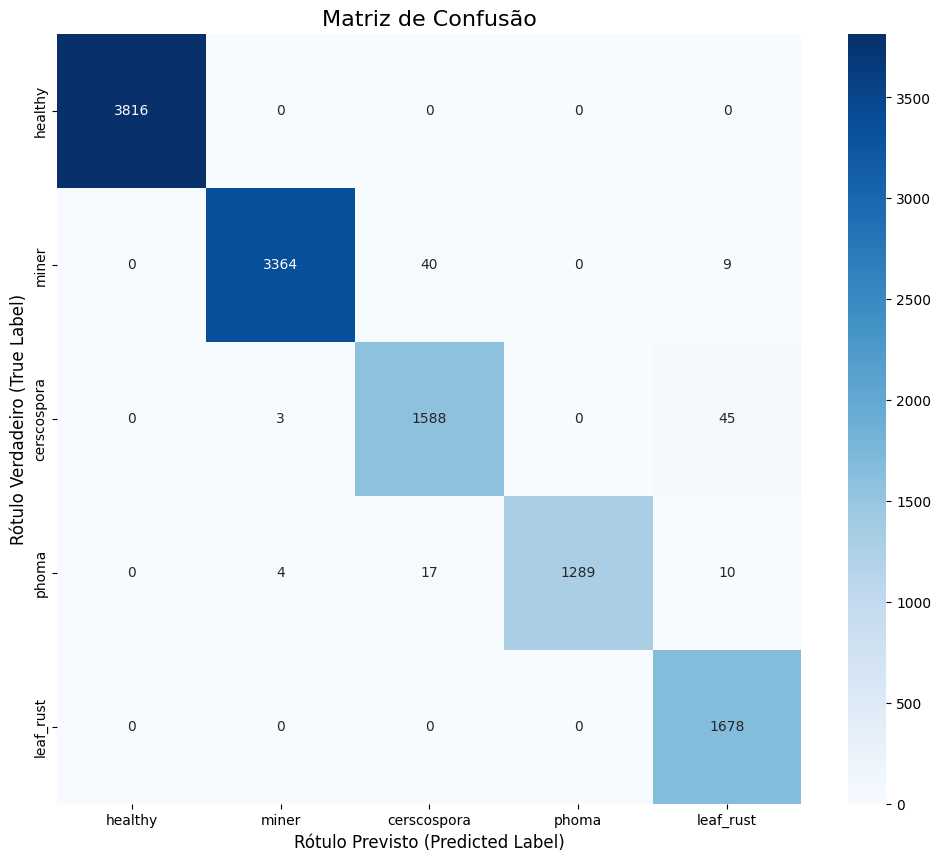

In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# --- 1. Fazer Previsões ---
# Usa o modelo treinado para prever as classes do conjunto de teste (X_test)
y_pred_probs = model.predict(X_test)

# --- 2. Converter Previsões e Rótulos ---
# O modelo retorna probabilidades. Pegamos o índice da maior probabilidade para cada previsão.
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# Seus rótulos y_test estão em formato one-hot (ex: [0, 1, 0, 0, 0]).
# Também pegamos o índice do valor '1' para obter o rótulo verdadeiro.
y_true_labels = np.argmax(y_test, axis=1)

# --- 3. Calcular a Matriz de Confusão ---
cm = confusion_matrix(y_true_labels, y_pred_labels)

# --- 4. Visualizar a Matriz ---
# A variável 'classes' que você definiu no início será usada para os rótulos do gráfico.
# classes = ['healthy', 'miner', 'cerscospora', 'phoma', 'leaf_rust']

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)

plt.title('Matriz de Confusão', fontsize=16)
plt.ylabel('Rótulo Verdadeiro (True Label)', fontsize=12)
plt.xlabel('Rótulo Previsto (Predicted Label)', fontsize=12)
plt.show()